# Examplary usage of our Evaluation Pipeline

The pipeline constructs a 4-Fold, each split represents the 10-minute drive of a single person. Therefore, in each fold one person's drive is used as test data whereas the remaining 3 drives are used for training. This approach ensures a stratified cross validation as each person drove the same road with the same labeling. 

![4-Fold CV](4-Fold-CV.png)

In [1]:
import sys
sys.path.append('..')
import pandas as pd

from utils.preprocessing import PreprocessingPipeline

In [2]:
# Define the start and end NTP times for each person's drive to remove standing times
ntp_intervals = {  # file+path: (start_ntp, end_ntp)
    '1_marco': ('2024-05-28 15:21:46.830', '2024-05-28 15:36:21.000'),
    '2_svenja': ('2024-05-28 15:39:02.218', '2024-05-28 15:52:16.613'),
    '3_konstantin': ('2024-05-28 15:56:31.000', '2024-05-28 16:09:37.000'),
    '4_aleyna': ('2024-05-28 16:11:26.149', '2024-05-28 16:21:35.000'),
}

In [3]:
pipeline = PreprocessingPipeline(ntp_intervals=ntp_intervals)
splits = pipeline.run() 

#### Structure of the splits
splits = [split1, split2, split3, split4]

split1 = (X_train, y_train, X_test, y_test)

In [4]:
# Examplray usage for a 4-Fold Cross-Validation
for i, (X_train, y_train, X_test, y_test) in enumerate(splits):
    print(f'Fold {i+1}')
    print(f'Train: {X_train.shape[0]}, Test: {X_test.shape[0]}\n')

Fold 1
Train: 4377, Test: 1747

Fold 2
Train: 4537, Test: 1587

Fold 3
Train: 4553, Test: 1571

Fold 4
Train: 4908, Test: 1216



<Axes: title={'center': "b'roughness_high'"}>

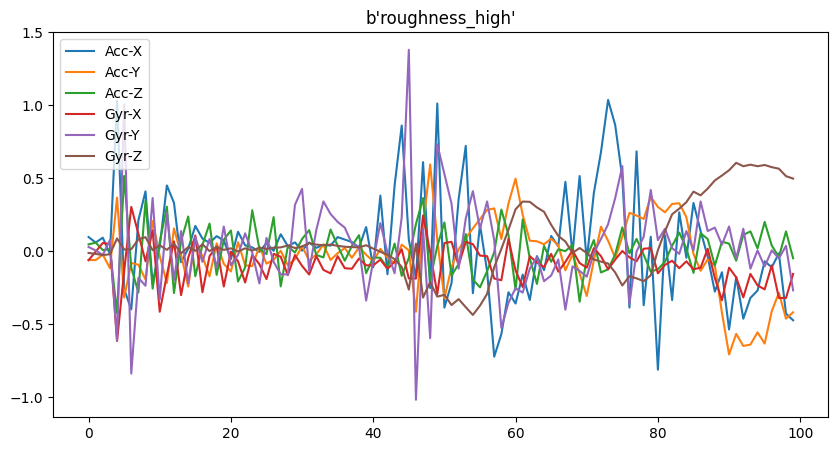

In [5]:
# Show first sample of a split
X_train, y_train, X_test, y_test = splits[0]
pd.DataFrame(X_train[0], columns=['Acc-X', 'Acc-Y', 'Acc-Z', 'Gyr-X', 'Gyr-Y', 'Gyr-Z']).plot(figsize=(10,5), title=y_train[0])

In [6]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5
0,0.096988,-0.060266,0.046389,-0.061542,0.028743,-0.012102
1,0.059459,-0.061164,0.058756,-0.002632,0.005295,-0.018474
2,0.092699,-0.023440,0.007913,0.056278,-0.025969,-0.026970
3,-0.018815,-0.115953,0.012951,0.048423,0.075640,-0.020598
4,1.030914,0.367273,-0.424481,-0.615295,-0.612178,0.087725
...,...,...,...,...,...,...
95,-0.069211,-0.633311,0.200749,-0.261836,-0.104131,0.591108
96,-0.109956,-0.411458,0.038602,-0.096888,0.005295,0.576240
97,-0.014526,-0.284813,-0.039266,-0.320745,-0.049418,0.565620
98,-0.428413,-0.462655,0.135707,-0.320745,0.036559,0.514644


## 2. Extract features